### Proceso de Datos NASA

In [ ]:
# reproyecion
#https://gis.stackexchange.com/questions/345650/how-do-i-add-projection-to-this-netcdf-file-satellite/345697#345697

In [3]:
#https://ladsweb.modaps.eosdis.nasa.gov/missions-and-measurements/products/MOD09A1G_NDVI#product-information
class NASA_HDF_CARACTERISTICAS:
  
  #--
  def __init__(self, path):

    from datetime import datetime

    self.path=path
    self.caracter = path.split('/')[-1].split('.')
    self.product = self.caracter[0]
    self.date_time = self.caracter[1]
    self.hori_ver_number = self.caracter[2]
    self.colle_number = self.caracter[3]
    self.product_date_time = self.caracter[4]
    self.hn = self.hori_ver_number.split('v')[0].split('h')[1]
    self.vn = self.hori_ver_number.split('v')[1]
    self.date = datetime.strptime(self.date_time, '%Y%j').strftime('%Y-%m-%d')
    self.year = datetime.strptime(self.date_time, '%Y%j').strftime('%Y')
    self.product_date = datetime.strptime(self.product_date_time, "%Y%d%m%H%M%S")

  #--
  @classmethod
  def nasa_carat(cls,path):

    try:
      return cls(path)
    
    except:
      return None
      
  #--
  def open_rasterio(self):

    import rioxarray 

    try:
      self.rds = rioxarray.open_rasterio(self.path, masked=True).squeeze()
    
    except:
      return None

In [8]:
import os
import numpy as np

dir = './MOD09A1G'

In [10]:
os.listdir(dir)

FileNotFoundError: [Errno 2] No such file or directory: './MOD09A1G'

In [9]:
# year
years_dis = list(map(lambda x: dir + '/' + x, os.listdir(dir)))

FileNotFoundError: [Errno 2] No such file or directory: './MOD09A1G'

In [4]:
import os
import numpy as np

dir = './MOD09A1G_NDVI'

# year
years_dis = list(map(lambda x: dir + '/' + x, os.listdir(dir)))

# month day
day_list = []
for day in years_dis:
   day_list += [day + '/' + y for y in os.listdir(day) ]

# file
files = []
for file in day_list:
  files += [file + '/' + y for y in os.listdir(file) ]

# caracteristicas de los archivos
nasa_files = list(filter(lambda x: x!=None ,list(map(lambda x: NASA_HDF_CARACTERISTICAS.nasa_carat(x), files)) )) 

FileNotFoundError: [Errno 2] No such file or directory: './MOD09A1G_NDVI'

In [148]:
# dias disponibles
days = list(set(list(map(lambda x: x.date, nasa_files))))
min(days)

'2012-01-12'

In [149]:
import rioxarray 

day = min(days)

# open_rasterio
def open_rds(x):
  x.open_rasterio()
  return x
rds_list = list(map(
                lambda x: open_rds(x),
                list(filter(lambda x: x.date == '2012-01-12', nasa_files))
              ))

rds_list

In [13]:
 def test_decode_cf_datetime_non_standard_units(self):
     expected = pd.date_range(periods=100, start='1970-01-01', freq='h')
     # netCDFs from madis.noaa.gov use this format for their time units
     # they cannot be parsed by netcdftime, but pd.Timestamp works
     units = 'hours since 1-1-1970'
     actual = conventions.decode_cf_datetime(np.arange(100), units)
     self.assertArrayEqual(actual, expected)



In [20]:
import rioxarray 
import cftime

rds = rioxarray.open_rasterio('cerro_saroche/MOD13Q1_V6/summary/summary.MOD13Q1V6.20120101.20220423.nc',
decode_times=True,
use_cftime=True,
masked=True,
variable=['QA_NDVI','QA_EVI']
).squeeze()

In [22]:
rds

<xarray.Dataset>
Dimensions:      (y: 116, x: 221, time: 198)
Coordinates:
  * y            (y) float64 1.145e+06 1.145e+06 ... 1.119e+06 1.119e+06
  * x            (x) float64 -7.647e+06 -7.647e+06 ... -7.596e+06 -7.596e+06
  * time         (time) int64 734503 734519 734535 ... 738236 738252 738268
    spatial_ref  int64 0
Data variables:
    QA_EVI       (time, y, x) float32 ...
    QA_NDVI      (time, y, x) float32 ...
Attributes: (12/173)
    ALGORITHMPACKAGEACCEPTANCEDATE:      102004
    ALGORITHMPACKAGEMATURITYCODE:        Normal
    ALGORITHMPACKAGENAME:                MOD_PR13A1
    ALGORITHMPACKAGEVERSION:             6
    ASSOCIATEDINSTRUMENTSHORTNAME.1:     MODIS
    ASSOCIATEDPLATFORMSHORTNAME.1:       Terra
    ...                                  ...
    SOUTHBOUNDINGCOORDINATE:             0
    SPSOPARAMETERS:                      2749, 4334, 2749a, 4334a
    TileID:                              51010008
    VERSIONID:                           6
    VERTICALTILENUMBER:                  8
    WESTBOUNDINGCOORDINATE:              -81.23412894334

(array([ 15394., 105321., 418991., 415433., 270032., 144621.,  72211.,
         30452.,   6301.,    448.]),
 array([0.0025    , 0.10218   , 0.20186   , 0.30154   , 0.40122   ,
        0.50090003, 0.60058   , 0.70026   , 0.79994   , 0.89962   ,
        0.9993    ], dtype=float32),
 <BarContainer object of 10 artists>)

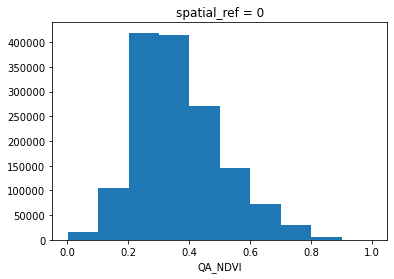

In [21]:
rds['QA_NDVI'].plot()

In [160]:
rds_list[0].rds

<xarray.Dataset>
Dimensions:           (y: 2400, x: 2400)
Coordinates:
  * y                 (y) float64 1.112e+06 1.111e+06 1.111e+06 ... 695.0 231.7
  * x                 (x) float64 -8.895e+06 -8.895e+06 ... -7.784e+06
    band              int64 1
    spatial_ref       int64 0
Data variables:
    MODIS_NDVI        (y, x) int16 ...
    Smoothed_NDVI     (y, x) int16 ...
    Composed_NDVI     (y, x) int16 ...
    MODIS_NDVI_QC     (y, x) uint8 ...
    Smoothed_NDVI_QC  (y, x) uint8 ...
    Composed_NDVI_QC  (y, x) uint8 ...
Attributes: (12/22)
    DAYNIGHTFLAG:             D
    EASTBOUNDINGCOORDINATE:   -69.991667
    HDFEOSVersion:            HDFEOS_V2.19
    HORIZONTALTILENUMBER:     10
    INPUTPOINTER:             MOD09A1.A2011001.h10v08.006.2015216140558.hdf,M...
    LOCALGRANULEID:           MOD09A1G_NDVI.A2012121.h10v08.006.2018295183136...
    ...                       ...
    SHORTNAME:                MOD09A1G_NDVI
    SOUTHBOUNDINGCOORDINATE:  0.0
    TileID:                   51010008
    VERSIONID:                6
    VERTICALTILENUMBER:       8
    WESTBOUNDINGCOORDINATE:   -81.234129

In [150]:
try:
  rds = rds_list[0]\
          .rds.merge(rds_list[1].rds)\
          .merge(rds_list[2].rds)
except:
  rds = None

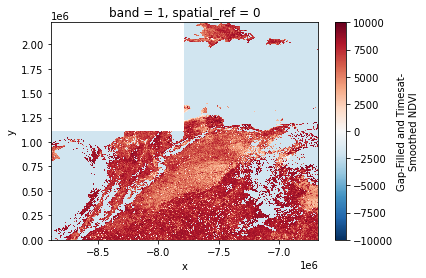

In [151]:
rds['Smoothed_NDVI'].plot()

In [171]:
rds.rio.crs

CRS.from_wkt('PROJCS["unnamed",GEOGCS["Unknown datum based upon the custom spheroid",DATUM["Not specified (based on custom spheroid)",SPHEROID["Custom spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [169]:
import geopandas

# lectura del poligono
park_boundary = geopandas.read_file('./cerro_saroche/cerro_saroche.shp')

In [170]:
park_boundary.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [173]:
# validando crs
if not park_boundary.crs == rds.rio.crs:
    park_bound_sin = park_boundary.to_crs(rds.rio.crs)

park_bound_sin.crs

<Derived Projected CRS: PROJCS["unnamed",GEOGCS["Unknown datum based upon  ...>
Name: unnamed
Axis Info [cartesian]:
- [east]: Easting (Meter)
- [north]: Northing (Meter)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Sinusoidal
Datum: Not specified (based on custom spheroid)
- Ellipsoid: Custom spheroid
- Prime Meridian: Greenwich

In [184]:
ndvi = rds.rio.clip(park_bound_sin.geometry,
                    all_touched=True,
                    from_disk=True).squeeze()

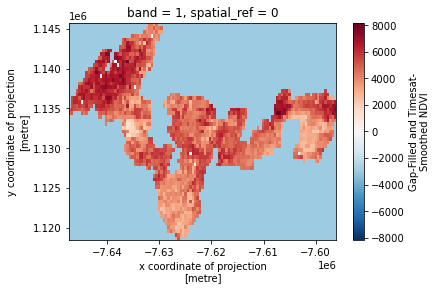

In [185]:
ndvi.Smoothed_NDVI.plot()

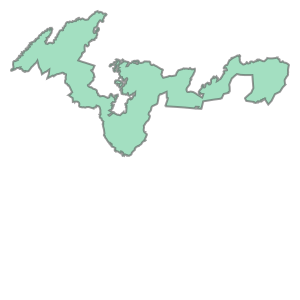

In [174]:
park_bound_sin.geometry[0]

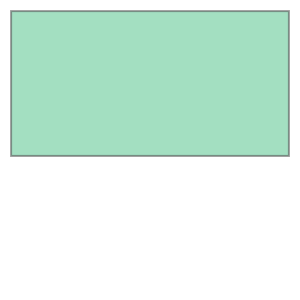

In [179]:
from shapely.geometry import mapping, box

crop_bound_box = [box(*park_bound_sin.total_bounds)]
crop_bound_box[0]

In [181]:
# Open just the bands that you want to process
desired_bands = ["sur_refl_b01_1",
                 "sur_refl_b02_1",
                 "sur_refl_b03_1",
                 "sur_refl_b04_1",
                 "sur_refl_b07_1"]

#  Create a box representing the spatial extent of your data
crop_bound_box = [box(*park_bound_sin.total_bounds)]
# Clip the data by  chaining together rio.clip with rio.open_rasterio
# from_disk=True allows you to only open the data that you wish to work with
modis_pre_clip = rioxarray.open_rasterio(rds.to_array(),
                                   masked=True,
                                   variable=desired_bands).rio.clip(crop_bound_box,
                                                                    crs=rds.rio.crs,
                                                                    # Include all pixels even partial pixels
                                                                    all_touched=True,
                                                                    from_disk=True).squeeze()
# The final clipped data
modis_pre_clip

TypeError: unhashable type: 'DataArray'

In [1]:
######################################

In [3]:
import sys, gc
import geopandas
import rioxarray 
from rioxarray.merge import merge_datasets
from shapely.geometry import mapping

import os
import numpy as np

class NASA_HDF_CARACTERISTICAS:
  """
  clase para la manipulacion de los archivos .hdf de la NASA
  """
  
  #--
  def __init__(self, path):

    from datetime import datetime

    self.path=path
    self.caracter = path.split('/')[-1].split('.')
    self.product = self.caracter[0]
    self.date_time = self.caracter[1]
    self.hori_ver_number = self.caracter[2]
    self.colle_number = self.caracter[3]
    self.product_date_time = self.caracter[4]
    self.hn = self.hori_ver_number.split('v')[0].split('h')[1]
    self.vn = self.hori_ver_number.split('v')[1]

    self.date = datetime.strptime(self.date_time, '%Y%j').strftime('%Y-%m-%d')
    self.year = datetime.strptime(self.date_time, '%Y%j').strftime('%Y')
    self.product_date = datetime.strptime(self.product_date_time, "%Y%d%m%H%M%S")

  #--
  @classmethod
  def nasa_carat(cls,path):

    try:
      return cls(path)
    
    except:
      return None
      
  #--
  def open_rasterio(self,variable):

    import rioxarray 

    try:
      self.rds = rioxarray.open_rasterio(self.path,
                                         masked=True,
                                         variable=variable).squeeze()
    
    except:
      return None
  
  #--
  @staticmethod
  def create_tif_park_data(rds_list, park_boundary):

    # merge de rds
    # rds = rds_list[0]\
    #         .rds.merge(rds_list[1].rds)\
    #         .merge(rds_list[2].rds)\
    #         .squeeze()
    rds = merge_datasets( list(map(lambda x: x.rds, rds_list)) )


    # validando crs
    if not park_boundary.crs == rds.rio.crs:
        park_bound_sin = park_boundary.to_crs(rds.rio.crs)

    # ndvi del parque
    ndvi = rds.rio.clip(park_bound_sin.geometry.apply(mapping),
                        all_touched=True,
                        from_disk=True)\
                        .squeeze()\
                        .chunk("auto")

    return ndvi

In [4]:
# lectura del poligono
park_boundary = geopandas.read_file('./cerro_saroche/poligono_cerro_saroche/cerro_saroche.shp')

# buscando archivos
dir = './MOD13Q1'

# year
years_dis = list(map(lambda x: dir + '/' + x, os.listdir(dir)))

# month day
day_list = []
for day in years_dis:
  day_list += [day + '/' + y for y in os.listdir(day) ]

# file
files = []
for file in day_list:
  files += [file + '/' + y for y in os.listdir(file) ]

# caracteristicas de los archivos
nasa_files = list(filter(lambda x: x!=None ,list(map(lambda x: NASA_HDF_CARACTERISTICAS.nasa_carat(x), files)) )) 

# dias disponibles
days = list(set(list(map(lambda x: x.date, nasa_files))))

In [8]:
days = list(filter(lambda x: x.find('2012-02')!=-1,days))

In [9]:
days

[]

In [27]:
day = days[0]

In [28]:
# open_rasterio
def open_rds(x):
  variable = ['250m 16 days NDVI','250m 16 days EVI','250m 16 days VI Quality']
  x.open_rasterio(variable=variable)
  return x
rds_list = list(map(
                lambda x: open_rds(x),
                list(filter(lambda x: x.date == day, nasa_files))
              ))

In [20]:
rds_list

In [31]:
# generando NDVI
ndvi = NASA_HDF_CARACTERISTICAS.create_tif_park_data(rds_list=rds_list, park_boundary=park_boundary)

In [32]:
ndvi

<xarray.Dataset>
Dimensions:                  (y: 116, x: 221)
Coordinates:
  * y                        (y) float64 1.145e+06 1.145e+06 ... 1.119e+06
  * x                        (x) float64 -7.647e+06 -7.647e+06 ... -7.596e+06
    band                     int64 1
    spatial_ref              int64 0
Data variables:
    250m 16 days NDVI        (y, x) float32 dask.array<chunksize=(116, 221), meta=np.ndarray>
    250m 16 days EVI         (y, x) float32 dask.array<chunksize=(116, 221), meta=np.ndarray>
    250m 16 days VI Quality  (y, x) float32 dask.array<chunksize=(116, 221), meta=np.ndarray>
Attributes: (12/173)
    ALGORITHMPACKAGEACCEPTANCEDATE:      102004
    ALGORITHMPACKAGEMATURITYCODE:        Normal
    ALGORITHMPACKAGENAME:                MOD_PR13A1
    ALGORITHMPACKAGEVERSION:             6
    ASSOCIATEDINSTRUMENTSHORTNAME.1:     MODIS
    ASSOCIATEDPLATFORMSHORTNAME.1:       Terra
    ...                                  ...
    SOUTHBOUNDINGCOORDINATE:             0.0
    SPSOPARAMETERS:                      2749, 4334, 2749a, 4334a
    TileID:                              51010008
    VERSIONID:                           6
    VERTICALTILENUMBER:                  8
    WESTBOUNDINGCOORDINATE:              -81.23412894334

In [49]:




# directorio
save_path = f'./cerro_saroche/MOD13Q1_V6/park_clip/{day}'
if not os.path.exists(save_path):
    os.mkdir(save_path)

# nombre de archivo
path_caracteristica = rds_list[0].path.split('/')
name_file = path_caracteristica[1] + '.' + path_caracteristica[2] + '.' + path_caracteristica[3]

# guardando
#ndvi.to_netcdf(f"{save_path}/{name_file}.nc")
ndvi.to_netcdf(f"./{name_file}.nc")

print('->OK')

->OK


In [50]:
da = rioxarray.open_rasterio(f'./{name_file}.nc',
                            masked=True)\
                          .squeeze()

da                        

<xarray.Dataset>
Dimensions:                  (y: 116, x: 221)
Coordinates:
  * y                        (y) float64 1.145e+06 1.145e+06 ... 1.119e+06
  * x                        (x) float64 -7.647e+06 -7.647e+06 ... -7.596e+06
    band                     int64 1
    spatial_ref              int64 0
Data variables:
    250m 16 days NDVI        (y, x) float32 ...
    250m 16 days EVI         (y, x) float32 ...
    250m 16 days VI Quality  (y, x) float32 ...
Attributes: (12/173)
    ALGORITHMPACKAGEACCEPTANCEDATE:      102004
    ALGORITHMPACKAGEMATURITYCODE:        Normal
    ALGORITHMPACKAGENAME:                MOD_PR13A1
    ALGORITHMPACKAGEVERSION:             6
    ASSOCIATEDINSTRUMENTSHORTNAME.1:     MODIS
    ASSOCIATEDPLATFORMSHORTNAME.1:       Terra
    ...                                  ...
    SOUTHBOUNDINGCOORDINATE:             0
    SPSOPARAMETERS:                      2749, 4334, 2749a, 4334a
    TileID:                              51010008
    VERSIONID:                           6
    VERTICALTILENUMBER:                  8
    WESTBOUNDINGCOORDINATE:              -81.23412894334

In [51]:
da.rio.crs

CRS.from_wkt('PROJCS["unnamed",GEOGCS["Unknown datum based upon the custom spheroid",DATUM["Not specified (based on custom spheroid)",SPHEROID["Custom spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [52]:
import pandas as pd 
da = da.assign_coords(time = pd.to_datetime( '2019-05-10' ))
da = da.expand_dims(dim="time")

In [2]:
# buscando archivos
dir = './MOD13Q1'

# year
years_dis = list(map(lambda x: dir + '/' + x, os.listdir(dir)))

# month day
day_list = []
for day in years_dis:
  day_list += [day + '/' + y for y in os.listdir(day) ]

# file
files = []
for file in day_list:
  files += [file + '/' + y for y in os.listdir(file) ]

# caracteristicas de los archivos
nasa_files = list(filter(lambda x: x!=None ,list(map(lambda x: NASA_HDF_CARACTERISTICAS.nasa_carat(x), files)) )) 

# dias disponibles
days = list(set(list(map(lambda x: x.date, nasa_files))))

NameError: name 'NASA_HDF_CARACTERISTICAS' is not defined